# Comparison between ODE and Boolean networks

Implementation and output comparison of a **NAND** netowrk

In [1]:
from src.network_builder import Builder, GRN
from src import simulator
from src.bool_sim import BooleanNetwork
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from src.utils import plot_trajectory

%load_ext autoreload
%autoreload 2

In [17]:
def get_results(grn: GRN, initial_states: list[dict[str, int]]):
  # Create a figure and GridSpec
  fig = plt.figure(figsize=(10, 8))
  gs = GridSpec(3, 2, figure=fig)

  # Create subplots in the desired layout
  ax1 = fig.add_subplot(gs[0, 0])  # Graph1
  ax2 = fig.add_subplot(gs[0, 1])  # Graph2
  ax3 = fig.add_subplot(gs[1, :])  # Graph3 spanning two columns
  ax4 = fig.add_subplot(gs[2, :])  # Graph4 spanning two columns



  # Boolean
  bool_network = BooleanNetwork(grn)
  # plot the interaction graph
  bool_network.plot_interaction_graph(ax=ax1)

  # plot the state transition graph
  bool_network.plot_state_transitions(ax=ax2)

  T, Y = simulator.simulate_sequence(
      grn, [tuple([v*100 for v in state.values()]) for state in initial_states], t_single=250, ax=ax3
  )
  ax3.set_xticks([])
  ax3.set_xlabel("")  


  out = []
  
  current_state = {species: 0 for species in list(set(grn.species_names) - set(grn.input_species_names))}
  for state in initial_states:
    out.extend(bool_network.simulate(state | current_state, "sync", 10))
    for key in current_state.keys():
      current_state[key] = out[-1][key]

  # print(out)
  plot_trajectory(out, grn.species_names, "Cycle 1", ax=ax4)
  ax4.set_xticks([])
  ax4.set_xlabel("")  

  # Add titles to each subplot (optional)
  ax1.set_title("Interaction graph")
  ax2.set_title("State transition graph")
  ax3.set_title("ODE outputs")
  ax4.set_title("BoolNet outputs")
  # Adjust layout for better spacing
  plt.tight_layout()

  # Display the plot
  plt.show()
  
  pass

In [3]:
initial_states = [
  {"X1": 0, "X2": 0},
  {"X1": 0, "X2": 1},
  {"X1": 1, "X2": 0}, 
  {"X1": 1, "X2": 1},
  ]

## AND gate

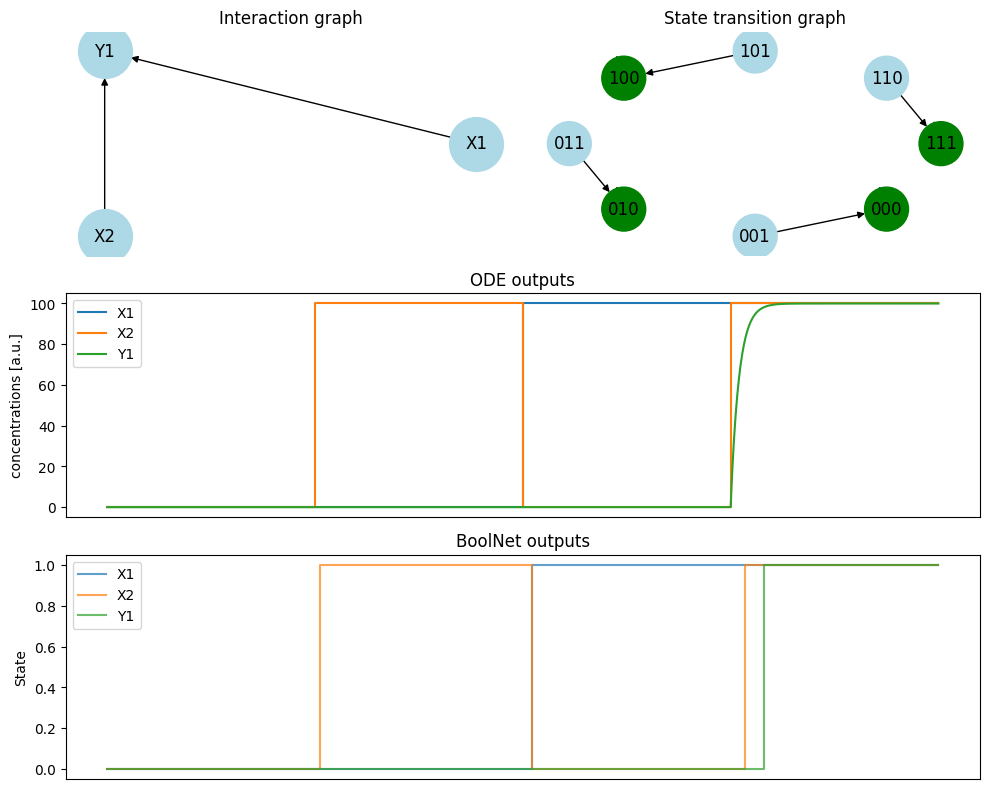

In [4]:
grn_builder = Builder()
# input species
X1 = grn_builder.species("X1")
X2 = grn_builder.species("X2")

# other species
Y1 = grn_builder.species("Y1", 0.1)

# regulators of a gene
regulators = [
    X1.activates(Kd=5, n=3),
    X2.activates(Kd=5, n=3),
]
# products of a gene
products = [Y1]

# adding a gene to the network - the alpha parameter specifies the rate of gene expression
grn_builder.gene(regulators=regulators, products=products, alpha=10)

grn = grn_builder.grn

get_results(grn=grn, initial_states=initial_states)

## NOR gate

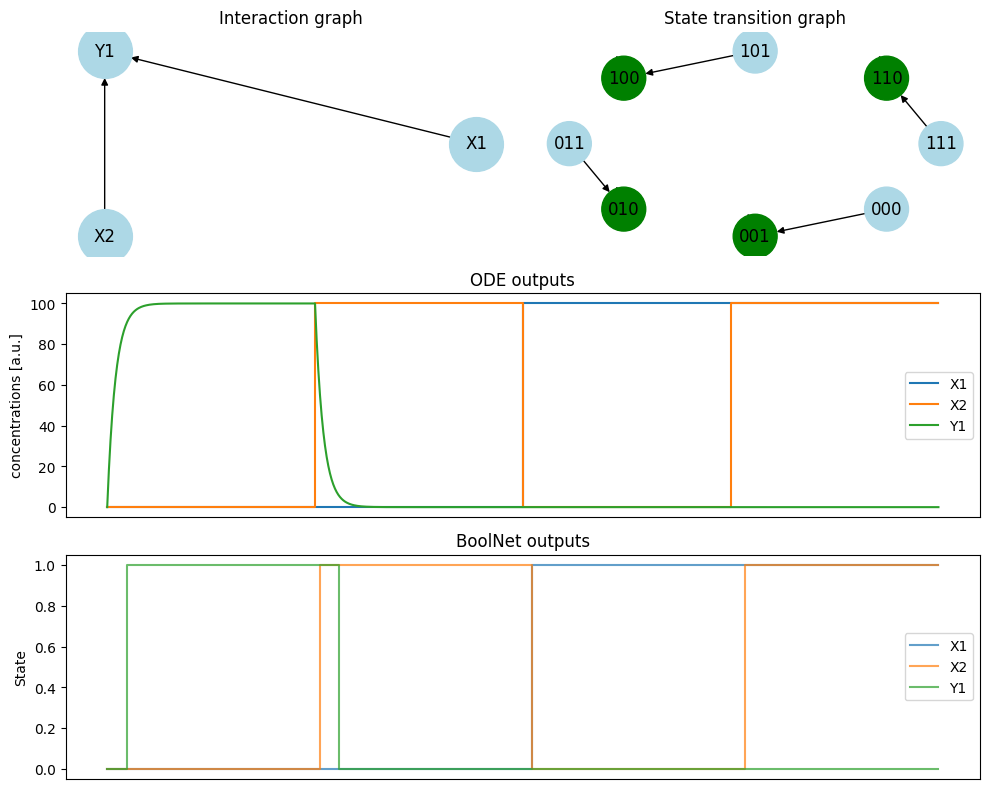

In [5]:
grn_builder = Builder()
# input species
X1 = grn_builder.species("X1")
X2 = grn_builder.species("X2")

# other species
Y1 = grn_builder.species("Y1", 0.1)

# products of a gene
products = [Y1]

regulators = [
    X1.represses(Kd=5, n=3),
    X2.represses(Kd=5, n=3),
]

# adding a gene to the network - the alpha parameter specifies the rate of gene expression
grn_builder.gene(regulators=regulators, products=products, alpha=10)
grn = grn_builder.grn

get_results(grn=grn, initial_states=initial_states)

## OR gate

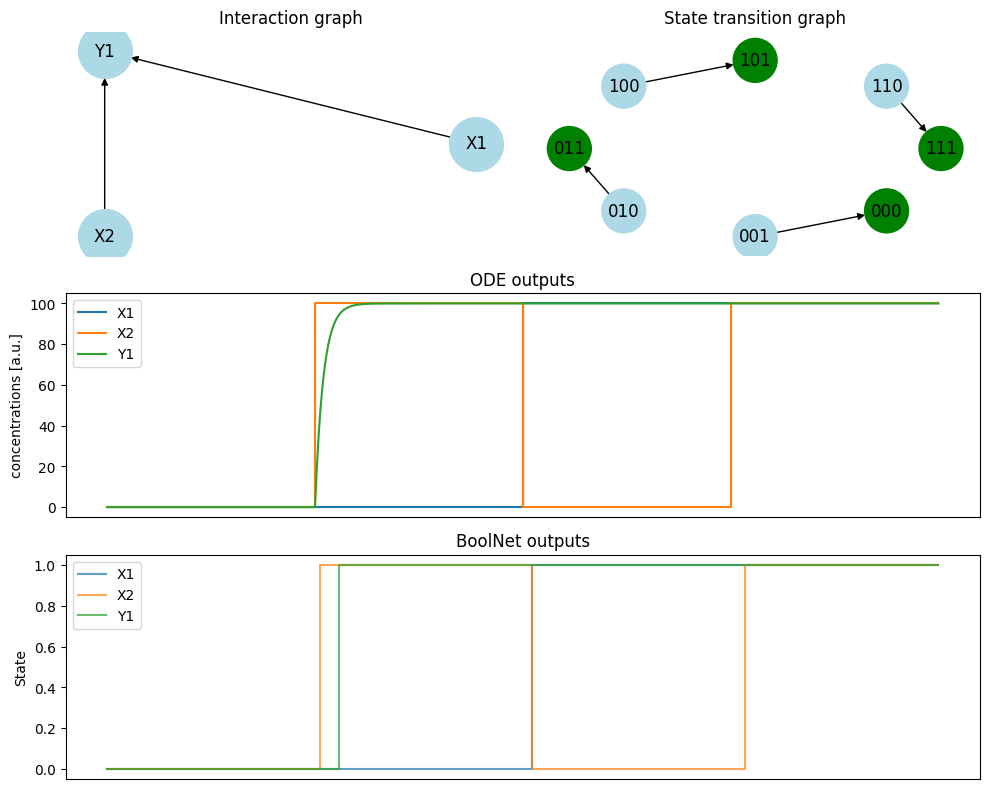

In [6]:
grn_builder = Builder()
# input species
X1 = grn_builder.species("X1")
X2 = grn_builder.species("X2")

# other species
Y1 = grn_builder.species("Y1", 0.1)

# products of a gene
products = [Y1]

# adding a gene to the network - the alpha parameter specifies the rate of gene expression
grn_builder.gene(regulators=[
    X1.activates(Kd=5, n=3),
    X2.activates(Kd=5, n=3),
], products=products, alpha=10)

grn_builder.gene(regulators=[
    X1.activates(Kd=5, n=3),
    X2.represses(Kd=5, n=3),
], products=products, alpha=10)

grn_builder.gene(regulators=
                 [
    X1.represses(Kd=5, n=3),
    X2.activates(Kd=5, n=3),
], products=products, alpha=10)

grn = grn_builder.grn

get_results(grn=grn, initial_states=initial_states)

## XOR gate

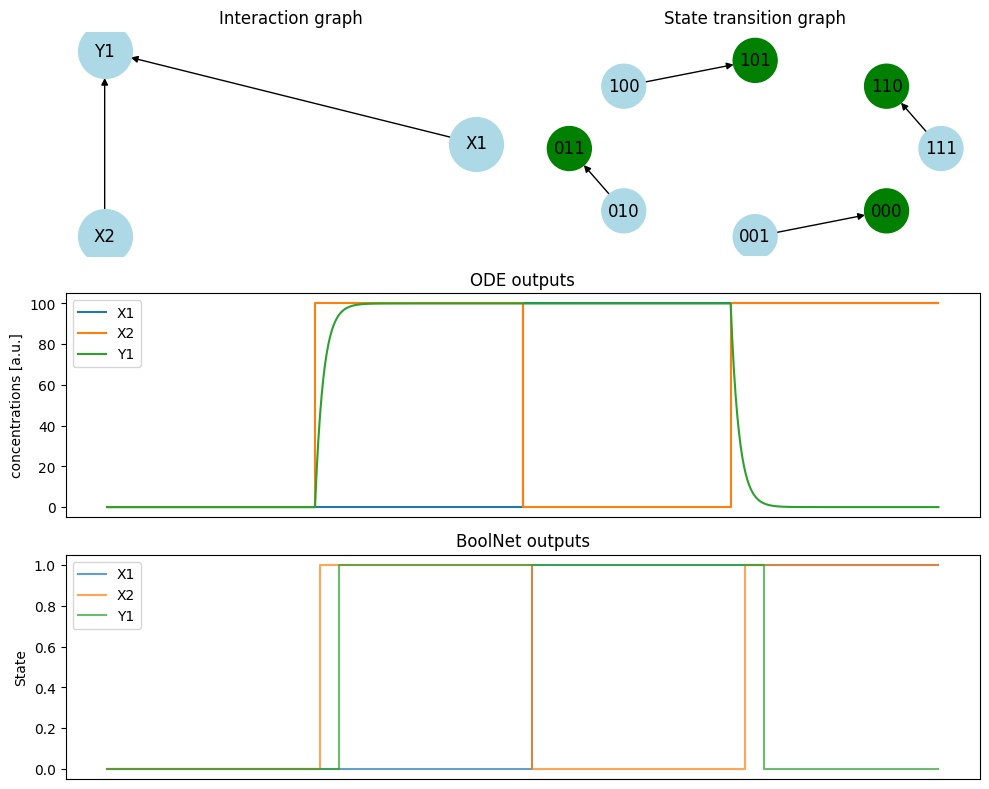

In [7]:
grn_builder = Builder()
# input species
X1 = grn_builder.species("X1")
X2 = grn_builder.species("X2")

# other species
Y1 = grn_builder.species("Y1", 0.1)

# products of a gene
products = [Y1]

# adding a gene to the network - the alpha parameter specifies the rate of gene expression
grn_builder.gene(regulators=[
    X1.activates(Kd=5, n=3),
    X2.represses(Kd=5, n=3),
], products=products, alpha=10)

grn_builder.gene(regulators=
                 [
    X1.represses(Kd=5, n=3),
    X2.activates(Kd=5, n=3),
], products=products, alpha=10)

grn = grn_builder.grn

get_results(grn=grn, initial_states=initial_states)

## Repressilator

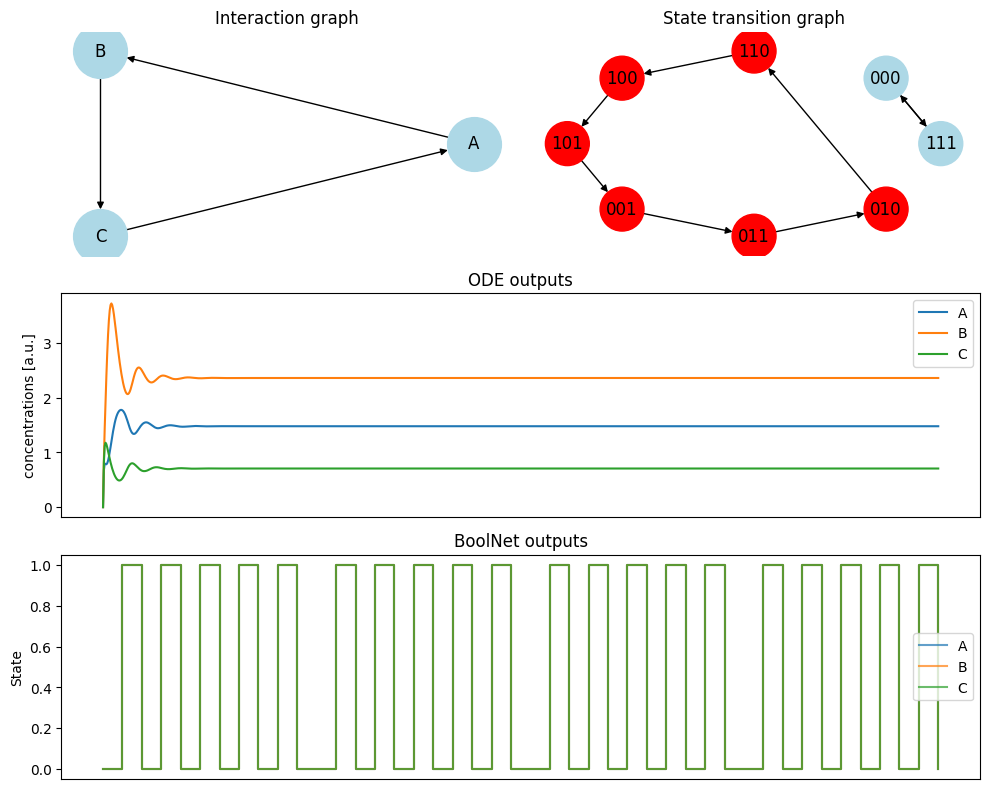

In [34]:
grn_builder = Builder()

A = grn_builder.species("A", delta=0.5)
B = grn_builder.species("B", delta=0.1)
C = grn_builder.species("C", delta=0.1)

# adding a gene to the network - the alpha parameter specifies the rate of gene expression
grn_builder.gene(regulators=[
    A.represses(Kd=1, n=3),
], products=[B], alpha=1)

grn_builder.gene(regulators=[
    B.represses(Kd=1, n=3),
], products=[C], alpha=1)

grn_builder.gene(regulators=[
    C.represses(Kd=1, n=3),
], products=[A], alpha=1)

grn = grn_builder.grn

get_results(grn=grn, initial_states=[{}, {}, {}, {}])